In [70]:
from pprint import pprint


valid_moves = {'Electric': ['Thunder', 'Thunderbolt', 'Wild Charge'],
               'Normal': ['Tail Whip', 'Quick Attack'],
               'Steel': ['Iron Tail', 'Iron Head', 'Flash Cannon']            
              }

electric_move_stats = {'Thunderbolt': {'Power': 90, 'Accuracy': 100, 'Type': 'Electric'},
                      'Thunder': {'Power': 110, 'Accuracy': 70, 'Type': 'Electric'},
                       'Wild Charge': {'Power': 90, 'Accuracy': 100, 'Type': 'Electric'}
                      }

normal_move_stats   = {'Tail Whip': {'Power': 0, 'Accuracy': 100, 'Type': 'Normal'},
                       'Quick Attack': {'Power': 40, 'Accuracy': 100, 'Type': 'Normal'}
                      }

steel_move_stats = {'Iron Tail': {'Power': 100, 'Accuracy': 75, 'Type': 'Steel'}
                   }


def identify_move_stats(name, move_type):
    if name not in valid_moves[move_type]:
        print('Error, %s not a valid move' % name)
        return None
        
    if move_type == 'Electric':
        return electric_move_stats[name]
    elif move_type == 'Normal':
        return normal_move_stats[name]
    elif move_type == 'Steel':
        return steel_move_stats[name]




class pikachu(object):
    
    def __init__(self, level):
        self.moves = {}
        self.level = level
        self.type  = 'Electric'
        
        self.maximum_stats   = {'health': 35, 'attack': 55, 'defense': 40}
        self.effective_stats = {'health': None, 'attack': None, 'defense': None}
        self._stat_calculation()
        self.current_hp = self.effective_stats['health']
        self.alive = True
           
        
    def _stat_calculation(self):
        
        # lambda function
        stat_calc = lambda x,y: int(x/100.*y)
        
        health = self.maximum_stats['health']
        effective_health = max(stat_calc(self.level, health), 5)
        self.effective_stats['health'] = effective_health
        
        attack = self.maximum_stats['attack']
        effective_attack = max(stat_calc(self.level, attack), 5)
        self.effective_stats['attack'] = effective_attack
        
        defense = self.maximum_stats['defense']
        effective_defense = max(stat_calc(self.level, defense), 5)
        self.effective_stats['defense'] = effective_defense
        
        
        
    def add_move(self, name=None, move_type=None):
        if len(self.moves.keys()) == 4:
            print('Error, can only have 4 moves maximum')
            return
        
        move_stats = identify_move_stats(name, move_type)
        if move_stats is not None: self.moves[name] = move_stats
  
    def print_stats(self):
        pprint(self.effective_stats)
        
    def print_moves(self):
        pprint(self.moves)
        
        
        



In [82]:
type_order = ['Normal', 'Fighting', 'Flying', 'Poison', 'Ground', 'Rock', 'Bug', 'Ghost', 'Steel', 'Fire', 'Water',
             'Grass', 'Electric', 'Psychic', 'Ice', 'Dragon', 'Dark', 'Fairy']

multiplier_index = [
                    [1, 1, 1 ,1, 1, 0.5, 1, 0, 0.5, 1, 1, 1, 1, 1, 1, 1, 1, 1], 
                    [2, 1, 0.5, 0.5, 1, 2, 0.5, 0, 2, 1, 1, 1, 1, 0.5, 2, 1, 2, 0.5], 
                    [1, 2, 1, 1, 1, 0.5, 2, 1, 0.5, 1, 1, 2, 0.5, 1, 1, 1, 1, 1],
                    [1,1,1,0.5,0.5,0.5,1,0.5,0,1,1,2,1,1,1,1,1,2],
                    [1,1,0,2,1,2,0.5,1,2,2,1,0.5,2,1,1,1,1,1], 
                    [1,0.5,2,1,0.5,1,2,1,0.5,2,1,1,1,1,2,1,1,1],
                    [1,0.5,0.5,0.5,1,1,1,0.5,0.5,0.5,1,2,1,2,1,1,2,0.5],
                    [0,1,1,1,1,1,1,2,1,1,1,1,1,2,1,1,0.5,1],
                    [1,1,1,1,1,2,1,1,0.5,0.5,0.5,1,0.5,1,2,1,1,2],
                    [1,1,1,1,1,0.5,2,1,2,0.5,0.5,2,1,1,2,0.5,1,1],
                    [1,1,1,1,2,2,1,1,1,2,0.5,0.5,1,1,1,0.5,1,1],
                    [1,1,0.5,0.5,2,2,0.5,1,0.5,0.5,2,0.5,1,1,1,0.5,1,1],
                    [1,1,2,1,0,1,1,1,1,1,2,0.5,0.5,1,1,0.5,1,1],
                    [1,2,1,2,1,1,1,1,0.5,1,1,1,1,0.5,1,1,0,1],
                    [1,1,2,1,2,1,1,1,0.5,0.5,0.5,2,1,1,0.5,2,1,1,],
                    [1,1,1,1,1,1,1,1,0.5,1,1,1,1,1,1,2,1,0],
                    [1,0.5,1,1,1,1,1,2,1,1,1,1,1,2,1,1,0.5,0.5],
                    [1,2,1,0.5,1,1,1,1,0.5,0.5,1,1,1,1,1,2,2,1]     
                ]
def damage_multiplier(attack_type, defend_type):
    attack_index = type_order.index(attack_type)
    defend_index = type_order.index(defend_type)
    return multiplier_index[attack_index][defend_index]
    


def damage_calculation(level, move_power, self_attack, target_defense):
    ad = self_attack / target_defense
    dmg = 2. + ( 0.4 * level * move_power * ad) / 50.
    return round(dmg)

def perform_move(attacking_pokemon, defending_pokemon, move):
    # check if move is valid
    # include randomness because accuracy may not be 100'
    if move not in attacking_pokemon.moves:
        print("Move not valid")
        return 0
    move_hit = np.random.uniform(0,100)
    if move_hit > attacking_pokemon.moves[move]['Accuracy']:
        print("Move missed!")
        return 0
    
    # Get miltiplier here
    dmg_multiplier = damage_multiplier(attacking_pokemon.moves[move]['Type'], defending_pokemon.type)    
    move_damage = damage_calculation(attacking_pokemon.level, attacking_pokemon.moves[move]['Power'], attacking_pokemon.effective_stats['attack'], defending_pokemon.effective_stats['defense'])
    effective_move_damage = move_damage * dmg_multiplier
    print(move_damage, effective_move_damage)
    defending_pokemon.current_hp -= effective_move_damage
    return 1
    
    
    

0.5


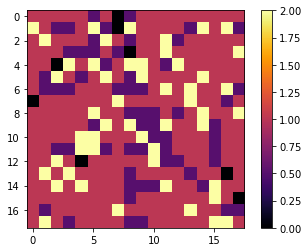

In [83]:
plt.imshow(multiplier_index, cmap='inferno')
plt.colorbar()

print(damage_multiplier('Electric', 'Electric'))

In [84]:

pika1 = pikachu(20)

pika1.add_move(name='Thunderbolt',move_type='Electric')
pika1.add_move(name='Tail Whip',move_type='Normal')
pika1.add_move(name='Quick Attack',move_type='Normal')
pika1.add_move(name='Iron Tail',move_type='Steel')

pika1.print_stats()
pika1.print_moves()



{'attack': 11, 'defense': 8, 'health': 7}
{'Iron Tail': {'Accuracy': 75, 'Power': 100, 'Type': 'Steel'},
 'Quick Attack': {'Accuracy': 100, 'Power': 40, 'Type': 'Normal'},
 'Tail Whip': {'Accuracy': 100, 'Power': 0, 'Type': 'Normal'},
 'Thunderbolt': {'Accuracy': 100, 'Power': 90, 'Type': 'Electric'}}


In [85]:

pika2 = pikachu(20)

pika2.add_move(name='Thunderbolt',move_type='Electric')
pika2.add_move(name='Tail Whip',move_type='Normal')
pika2.add_move(name='Quick Attack',move_type='Normal')
pika2.add_move(name='Iron Tail',move_type='Steel')

pika2.print_stats()
pika2.print_moves()



{'attack': 11, 'defense': 8, 'health': 7}
{'Iron Tail': {'Accuracy': 75, 'Power': 100, 'Type': 'Steel'},
 'Quick Attack': {'Accuracy': 100, 'Power': 40, 'Type': 'Normal'},
 'Tail Whip': {'Accuracy': 100, 'Power': 0, 'Type': 'Normal'},
 'Thunderbolt': {'Accuracy': 100, 'Power': 90, 'Type': 'Electric'}}


In [86]:
perform_move(pika1, pika2, 'Thunderbolt')
print(pika1.current_hp, pika2.current_hp)

22 11.0
7 -4.0
